# KNN기반의 농어 무게 예측 (회귀)
 - 목적: 농어의 길이를 입력으로 받아 농어의 무게를 예측한다.
 - input: 농어의 길이 (List)
 - output: 농어의 무게 (List)
 - Model: KNN regressor
 - 평가: R^2


In [2]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
# 1. 데이터 visualization
# 2. 데이터 전처리 (train/test split, 표준화)
# 3. 모델 학습 (fit)
# 4. 모델 평가 (score)
# 5. 결과분석 (그래프)
# 6. 모델 업데이터

In [5]:
import matplotlib.pyplot as plt

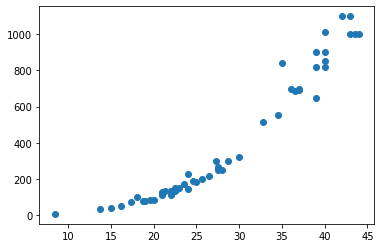

In [6]:
plt.scatter(perch_length, perch_weight)

In [7]:
from sklearn.model_selection import train_test_split


In [11]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [12]:
train_input.shape

(42,)

In [15]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [16]:
train_input.shape
test_input.shape

(14, 1)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
knr = KNeighborsRegressor(n_neighbors=5)

In [20]:
knr.fit(train_input, train_target) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
knr.score(train_input, train_target)

0.9698823289099255

In [22]:
knr.score(test_input, test_target)

0.9928094061010639

In [23]:
predicted = knr.predict(test_input)

In [31]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_target, predicted)

In [32]:
mae

19.157142857142862

In [33]:
#과소적합에 따른 모델 업데이트
knr.n_neighbors = 3

In [35]:
knr.score(test_input, test_target)

0.974645996398761

In [36]:
knr.score(train_input, train_target)

0.9804899950518966

In [39]:
x = np.arange(5, 45).reshape(-1, 1)

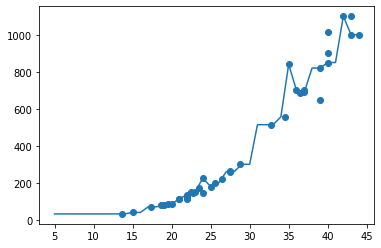

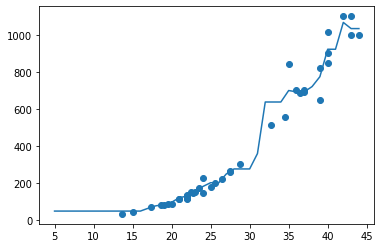

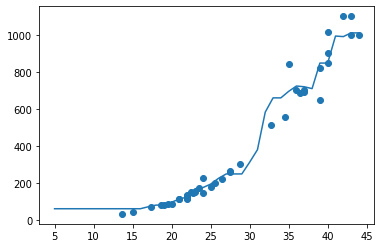

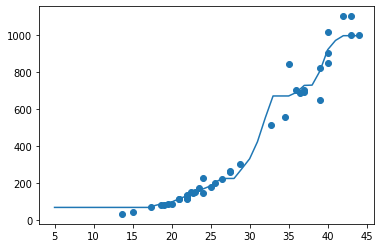

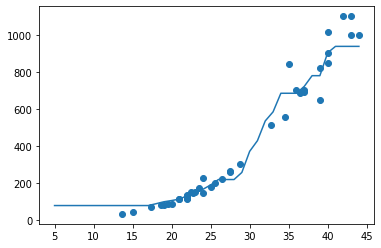

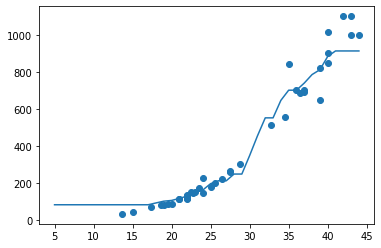

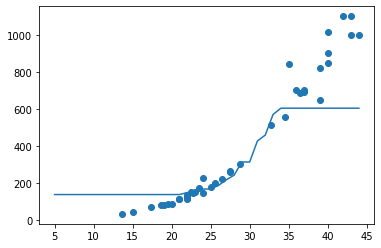

In [42]:
for n in [1, 3, 5, 7, 9, 10, 25]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.show()